In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
os.chdir("D:\\edWisor\\Project-II")

In [3]:
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [6]:
#Missing Values
df.loc[df['Reason for absence'] == 0,'Absenteeism time in hours'] = 0
from fancyimpute import KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.151
Imputing row 101/740 with 0 missing, elapsed time: 0.152
Imputing row 201/740 with 0 missing, elapsed time: 0.153
Imputing row 301/740 with 0 missing, elapsed time: 0.153
Imputing row 401/740 with 0 missing, elapsed time: 0.154
Imputing row 501/740 with 0 missing, elapsed time: 0.155
Imputing row 601/740 with 0 missing, elapsed time: 0.156
Imputing row 701/740 with 0 missing, elapsed time: 0.157


In [5]:
#Outlier analysis
for i in ['Absenteeism time in hours']:
    q75, q25 = np.percentile(df.loc[:,i], [75, 25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(min), print(max)
    df.loc[df[i] < minimum,i] = np.nan
    df.loc[df[i] > maximum, i] = np.nan

<built-in function min>
<built-in function max>


In [7]:
#Adding year column to have monthly data from July 2007 to July 2010. This will help grouping data month wise
df.loc[0:112, 'Year'] = 2007
df.loc[113:358, 'Year'] = 2008
df.loc[359:570, 'Year'] = 2009
df.loc[571:740, 'Year'] = 2010

#Setting the year variable position adjacent to month i.e postion number 3
cols_name = df.columns.tolist()
column_move = "Year"
new_position = 3
cols_name.insert(new_position, cols_name.pop(cols_name.index(column_move)))
df = df[cols_name]

#Removing months with entry as 0
df = df.loc[0:736,]
df.tail()

,ID,Reason for absence,Month of absence,Year,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
732,10.0,22.0,7.0,2010.0,4.0,1.0,361.0,52.0,3.0,28.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.000000
733,28.0,22.0,7.0,2010.0,4.0,1.0,225.0,26.0,9.0,28.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,8.000000
734,13.0,13.0,7.0,2010.0,2.0,1.0,369.0,17.0,12.0,31.0,...,0.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,25.0,7.735386
735,11.0,14.0,7.0,2010.0,3.0,1.0,289.0,36.0,13.0,33.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.000000
736,1.0,11.0,7.0,2010.0,3.0,1.0,235.0,11.0,14.0,37.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.000000


In [12]:
df.tail()

,ID,Reason for absence,Month of absence,Year,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11.0,14.0,7.0,2010.0,3.0,1.0,289.0,36.0,13.0,33.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1.0,11.0,7.0,2010.0,3.0,1.0,235.0,11.0,14.0,37.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4.0,0.0,0.0,2010.0,3.0,1.0,118.0,14.0,13.0,40.0,...,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8.0,0.0,0.0,2010.0,4.0,2.0,231.0,35.0,14.0,39.0,...,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
739,35.0,0.0,0.0,2010.0,6.0,3.0,179.0,45.0,14.0,53.0,...,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


# Simple Linear Regression

In [8]:
#Grouping the data based on year of month and total absenteeism hour
df = df.apply(pd.Series.astype, dtype = 'int')
df_linear = pd.DataFrame(df.groupby(['Year','Month of absence'])['Absenteeism time in hours'].sum())
df_linear

Absenteeism time in hours
Year Month of absence                           
2007 7                                        88
     8                                       107
     9                                        54
     10                                       74
     11                                       77
     12                                       59
2008 1                                        65
     2                                        87
     3                                       195
     4                                        78
     5                                        50
     6                                       100
     7                                       112
     8                                        65
     9                                        88
     10                                      117
     11                                       88
     12                                       69
2009 1                                        44
     2                                        86
     3                                       123
     4                                        55
     5                                        75
     6                                        63
     7                                        95
     8                                        76
     9                                        41
     10                                       99
     11                                       82
     12                                       68
2010 1                                        64
     2                                       101
     3                                       132
     4                                        95
     5                                       133
     6                                        77
     7                                        78

In [9]:
#Converting months into numerical series of numbers
df_linear_data = pd.DataFrame( {'Month' : range(1,38,1), 'Absenteeism time in hours': df_linear['Absenteeism time in hours']})
df_linear_data.reset_index(drop = True, inplace = True)
df_linear_data

,Month,Absenteeism time in hours
0,1,88
1,2,107
2,3,54
3,4,74
4,5,77
5,6,59
6,7,65
7,8,87
8,9,195
9,10,78


In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = df_linear_data.iloc[:, :-1].values
y = df_linear_data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

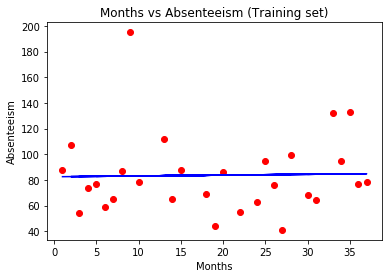

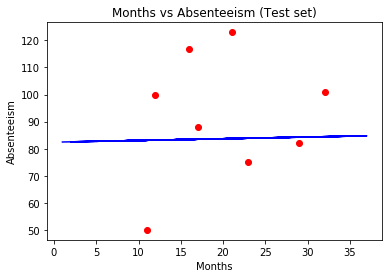

In [83]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Months vs Absenteeism (Training set)')
plt.xlabel('Months')
plt.ylabel('Absenteeism')
#plt.savefig('Model Graphs//Months vs Absenteeism (Training set) Linear Regression')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Months vs Absenteeism (Test set)')
plt.xlabel('Months')
plt.ylabel('Absenteeism')
#plt.savefig('Model Graphs//Months vs Absenteeism (Test set) Linear Regression')
plt.show()

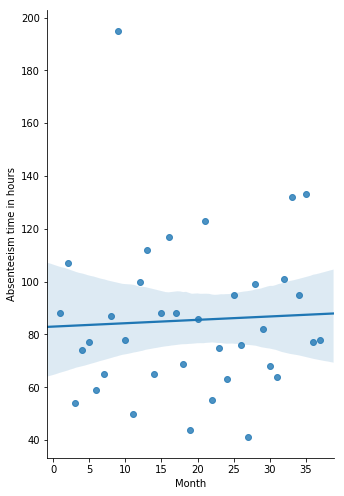

In [60]:
import seaborn as sns
sns.pairplot(df_linear_data, x_vars=['Month'], y_vars='Absenteeism time in hours', size=7, aspect=0.7, kind='reg')
plt.savefig("Model Graphs//Months vs Absenteeism (Test set) Linear Regression Performance")

In [ ]:
print (regressor.coef_)
print (regressor.intercept_)

In [84]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

19.37225287189445
553.4346073508973
23.5251909099777


In [96]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

20.369282906345994
898.7849524781129
29.979742368441276


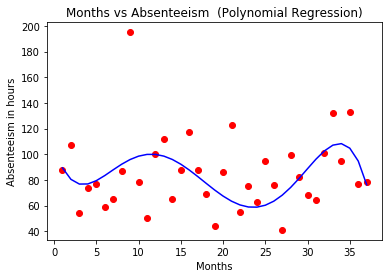

In [98]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Months vs Absenteeism  (Polynomial Regression)')
plt.xlabel('Months')
plt.ylabel('Absenteeism in hours')
plt.savefig('Model Graphs//graph3.jpg')
plt.show()

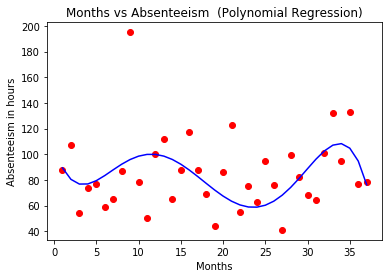

In [ ]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

# Time Series - ARIMA

In [10]:
date_range = pd.date_range('7/1/2007', periods=37, freq='M')

In [11]:
df_linear_data.index = date_range
df_linear_data

,Month,Absenteeism time in hours
2007-07-31,1,88
2007-08-31,2,107
2007-09-30,3,54
2007-10-31,4,74
2007-11-30,5,77
2007-12-31,6,59
2008-01-31,7,65
2008-02-29,8,87
2008-03-31,9,195
2008-04-30,10,78


In [12]:
X_train = pd.DataFrame(df_linear_data[0:30])
X_test = pd.DataFrame(df_linear_data[30:37])

In [138]:
X_test

,Month,Absenteeism time in hours
2010-01-31,31,64
2010-02-28,32,101
2010-03-31,33,132
2010-04-30,34,95
2010-05-31,35,133
2010-06-30,36,77
2010-07-31,37,78


In [130]:
df_linear_data

,Month,Absenteeism time in hours
2007-07-31,1,88
2007-08-31,2,107
2007-09-30,3,54
2007-10-31,4,74
2007-11-30,5,77
2007-12-31,6,59
2008-01-31,7,65
2008-02-29,8,87
2008-03-31,9,195
2008-04-30,10,78


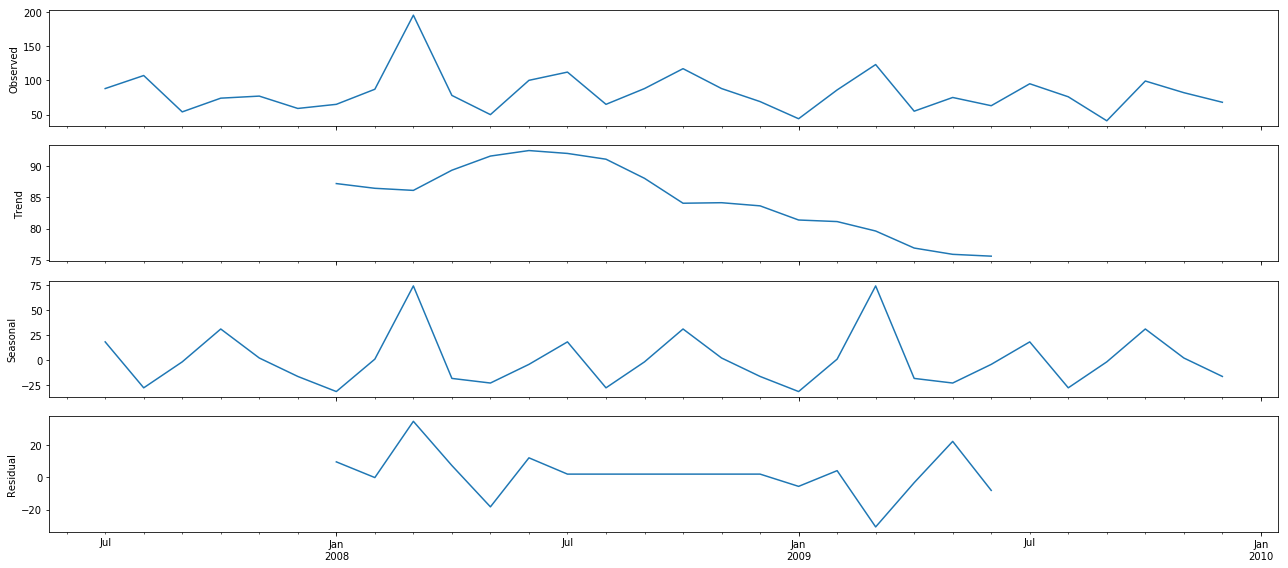

In [134]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(X_train['Absenteeism time in hours'], model='additive')
fig = decomposition.plot()
#plt.savefig('Model Graphs//decomposition.jpg')
plt.show()

In [18]:
import itertools
import statsmodels.api as sm
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X_train['Absenteeism time in hours'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:343.78910276871227
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:166.7711009360225
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:173.70112972039948
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:51.73568140404718
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:312.68735794954375
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:158.0231515915081
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:175.69708490255124
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:53.4808586180232
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:292.74890728553595
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:166.53212984822505
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:168.19023095238336
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:46.811963750527255
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:267.0373136964712
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:148.72083147019285
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:159.96063012414723
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:47.40428987902832
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:302.32922067670387
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:168.7531439130582


In [20]:
mod = sm.tsa.statespace.SARIMAX(X_train['Absenteeism time in hours'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3850      2.008     -0.192      0.848      -4.321       3.551
ar.S.L12      -0.5828      0.544     -1.072      0.284      -1.648       0.483
sigma2       299.9687    480.579      0.624      0.533    -641.949    1241.887


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2194: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2199: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & co

In [23]:
y_pred = results.predict(start="2010-01-31", end= "2010-07-31", dynamic=True)

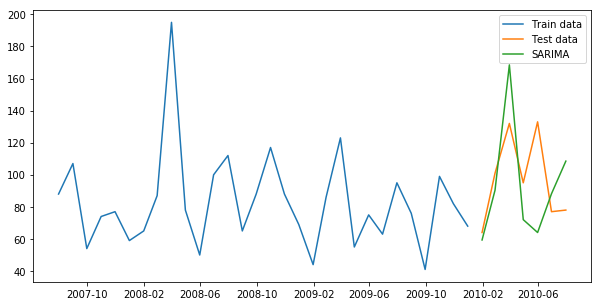

In [152]:
plt.figure(figsize=(10,5))
plt.plot( X_train['Absenteeism time in hours'], label='Train data')
plt.plot(X_test['Absenteeism time in hours'], label='Test data')
plt.plot(y_pred, label='SARIMA')
plt.legend(loc='best')
plt.savefig('Model Graphs//arima.jpg')
plt.show()

In [ ]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(X_test['Absenteeism time in hours'], y_pred))
print(metrics.mean_squared_error(X_test['Absenteeism time in hours'], y_pred))
print(np.sqrt(metrics.mean_squared_error(X_test['Absenteeism time in hours'], y_pred)))

In [ ]:
#Forecasting 2011 data
y_2011 = results.predict(start="2011-01-31", end= "2011-12-31", dynamic=True)

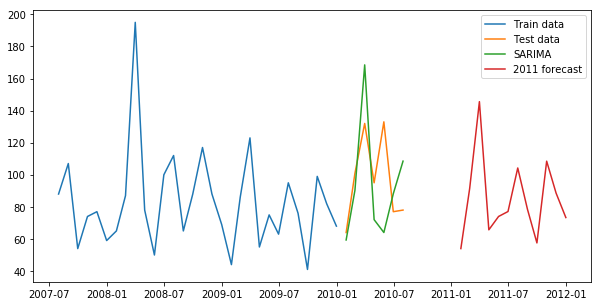

In [25]:
plt.figure(figsize=(10,5))
plt.plot( X_train['Absenteeism time in hours'], label='Train data')
plt.plot(X_test['Absenteeism time in hours'], label='Test data')
plt.plot(y_pred, label='SARIMA')
plt.plot(y_2011, label='2011 forecast')
plt.legend(loc='best')
plt.savefig('Model Graphs//arima_2011_forecast.jpg')
plt.show()

In [28]:
y_2011.to_csv("Forecast_2011.csv")